In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("root/Dataset/Fraud_sample.csv")

### 5. Preprocessing

In [23]:
df.isna().sum()

step                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
type_CASH_IN           0
type_CASH_OUT          0
type_DEBIT             0
type_PAYMENT           0
type_TRANSFER          0
blacklist_flag_org     0
blacklist_flag_dest    0
dtype: int64

In [24]:
ratio = df['isFraud'].value_counts(normalize=True)
print(ratio)

0    0.991854
1    0.008146
Name: isFraud, dtype: float64


In [25]:
df_new = df.drop(columns = ['step', 'isFlaggedFraud','nameOrig', 'nameDest','isFraud','oldbalanceOrg','oldbalanceDest'], axis = 'columns')

In [26]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
0,282,464600.35,C469131495,11028.00,0.00,C342883661,35315.32,499915.66,0,0,0.0,0.0,0.0,0.0,1.0,0,0
1,212,2517.63,C1525615562,106528.89,104011.26,M600929596,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0,0,0
2,235,57789.09,C1551452782,5555.00,0.00,C1662050128,0.00,57789.09,0,0,0.0,1.0,0.0,0.0,0.0,0,0
3,371,7698.26,C1776033547,0.00,0.00,M1370947243,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0,0,0
4,350,129727.76,C1741301290,10331.00,140058.76,C1909391927,0.00,0.00,0,0,1.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008208,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0,0,0
1008209,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0,0,0
1008210,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0,0,0
1008211,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0,0,0


In [27]:
df_new

,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
0,464600.35,0.00,499915.66,0.0,0.0,0.0,0.0,1.0,0,0
1,2517.63,104011.26,0.00,0.0,0.0,0.0,1.0,0.0,0,0
2,57789.09,0.00,57789.09,0.0,1.0,0.0,0.0,0.0,0,0
3,7698.26,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0,0
4,129727.76,140058.76,0.00,1.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1008208,339682.13,0.00,339682.13,0.0,1.0,0.0,0.0,0.0,0,0
1008209,6311409.28,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0
1008210,6311409.28,0.00,6379898.11,0.0,1.0,0.0,0.0,0.0,0,0
1008211,850002.52,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0


In [28]:
X = df_new

# Assign selling price as label
y = df["isFraud"]

In [29]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [32]:
from sklearn.preprocessing import StandardScaler

# Scale only numeric column
scaler = StandardScaler()
X_train[['amount',  'newbalanceOrig', 'newbalanceDest']] = scaler.fit_transform(X_train[['amount',  'newbalanceOrig', 'newbalanceDest']])
X_test[['amount',  'newbalanceOrig', 'newbalanceDest']]  = scaler.transform(X_test[['amount',  'newbalanceOrig', 'newbalanceDest']])


In [40]:
# save the scaler value for using on app
import pickle

pickle.dump(scaler, open('root/scaler.pkl', 'wb'))

In [ ]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://mlflow:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "noppawee"
#mlflow.create_experiment(name="noppawee-ML-project")  #create if you haven't create
mlflow.set_experiment(experiment_name="noppawee-ML-project")

<Experiment: artifact_location='mlflow-artifacts:/582804441036745157', creation_time=1699456093078, experiment_id='582804441036745157', last_update_time=1699456093078, lifecycle_stage='active', name='noppawee-ML-project', tags={}>

In [ ]:
X_train

,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
820610,-0.246340,-0.291441,-0.333399,0.0,0.0,0.0,1.0,0.0,0,0
33740,1.083374,-0.291441,0.248972,0.0,1.0,0.0,0.0,0.0,0,0
206398,-0.261414,-0.289684,-0.333399,0.0,0.0,0.0,1.0,0.0,0,0
837972,0.037388,0.548698,1.012512,1.0,0.0,0.0,0.0,0.0,0,0
1003116,0.499621,-0.291441,-0.184890,0.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
259178,0.192925,-0.291441,-0.117035,0.0,1.0,0.0,0.0,0.0,0,0
365838,0.083126,-0.291441,0.314962,0.0,1.0,0.0,0.0,0.0,0,0
131932,-0.148347,-0.251645,-0.166025,1.0,0.0,0.0,0.0,0.0,0,0
671155,0.206710,0.406205,-0.287883,1.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
# Model with imbalance class
##Baselines
from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability

##Complex
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
import xgboost as xgb

#model
lr = LogisticRegression(solver = 'liblinear',random_state=999)
rf = RandomForestClassifier(random_state=999)
gnb = GaussianNB()
xgbr = xgb.XGBClassifier(random_state = 999, learning_rate = 0.1)
models = [lr,gnb, rf,xgbr]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    if model == lr:
        mlflow.start_run(run_name="Logistic Regression with imbalance")
        mlflow.log_params(params={"model":"Logistic Regression"})
    elif model == rf:
        mlflow.start_run(run_name="Random Forest with imbalance")
        mlflow.log_params(params={"model":"Random Forest"})
    elif model == gnb:
        mlflow.start_run(run_name="Naive Bayesian - Gaussian with imbalance")
        mlflow.log_params(params={"model":"Naive Bayesian - Gaussian"})
    elif model == xgbr:
        mlflow.start_run(run_name="XGboost with imbalance")
        mlflow.log_params(params={"model":"XGboost"})
    
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')  #f1, recall, precision, accuracy
    print("model: ", model,"f1 Scores: ", score, "- f1 Scores mean: ", score.mean(), "- f1 Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    mlflow.log_metric(key="f1_score_mean", value=score.mean())
    mlflow.log_metric(key="f1_score_std", value=score.std())

    model.fit(X_train, y_train)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
    
                

    mlflow.end_run()


model:  LogisticRegression(random_state=999, solver='liblinear') f1 Scores:  [0.21316964 0.22719642 0.22703335 0.22447761 0.20357143] - f1 Scores mean:  0.21908969095708203 - f1 Scores std (lower better):  0.009313580689550667
model:  GaussianNB() f1 Scores:  [0.03769659 0.03757746 0.03594425 0.03529049 0.03562998] - f1 Scores mean:  0.03642775467045224 - f1 Scores std (lower better):  0.0010094915694982404
model:  RandomForestClassifier(random_state=999) f1 Scores:  [0.74834437 0.75156884 0.73700664 0.75773994 0.74398759] - f1 Scores mean:  0.747729476806098 - f1 Scores std (lower better):  0.006990122631031978
model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_co

0.9969153557755251
0.9369527145359019
0.6604938271604939
0.774800868935554
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100012
           1       0.94      0.66      0.77       810

    accuracy                           1.00    100822
   macro avg       0.97      0.83      0.89    100822
weighted avg       1.00      1.00      1.00    100822



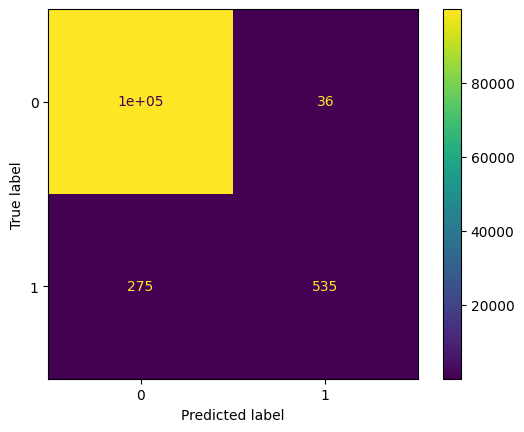

In [39]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load a model from MLflow
model = mlflow.pyfunc.load_model('runs:/1c7eb21c12f9438e99134c5d85a4cf0e/model/')
ypred = model.predict(X_test)

print(accuracy_score(y_test, ypred))
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))
print(f1_score(y_test, ypred))

# print classification report
print(classification_report(y_test, ypred))

#display confusion matrix
cm = confusion_matrix(y_test, ypred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()
